In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
from pandas import DataFrame 
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Federal_02216.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-American_B01362.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Prestige_B01338.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickup

**Read Dataset using Pandas DataFrame**

In [2]:
df_uber= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')

In [3]:
df_uber.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [4]:
df_uber.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

**convert data/time column into DateTime data type**

In [5]:
df_uber['Date/Time']=df_uber['Date/Time'].map(pd.to_datetime)

In [6]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
Date/Time    796121 non-null datetime64[ns]
Lat          796121 non-null float64
Lon          796121 non-null float64
Base         796121 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 24.3+ MB


In [7]:
def get_DateOfMonth(dt):
    return dt.day 
def get_weekday(dt):
    return dt.dayofweek 
def get_hour(dt):
    return dt.hour
def get_weekday_name(dt):
    return dt.day_name()
df_uber['DOM'] =df_uber['Date/Time'].map(get_DateOfMonth)
df_uber['Weekday'] =df_uber['Date/Time'].map(get_weekday)
df_uber['Hour'] =df_uber['Date/Time'].map(get_hour)
df_uber['DayOfWeek'] =df_uber['Date/Time'].map(get_weekday_name)

In [8]:
df_uber.head()

,Date/Time,Lat,Lon,Base,DOM,Weekday,Hour,DayOfWeek
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,1,0,Tuesday
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,1,0,Tuesday
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,1,0,Tuesday
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,1,0,Tuesday
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,1,0,Tuesday


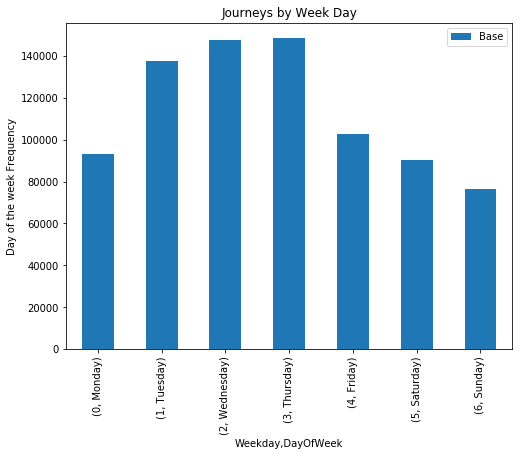

In [9]:
df_pivot_hour = df_uber.pivot_table(index=['Weekday','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
df_pivot_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Day of the week Frequency')
plt.title('Journeys by Week Day');

Text(23, 45, '$\\mu=15, b=3$')

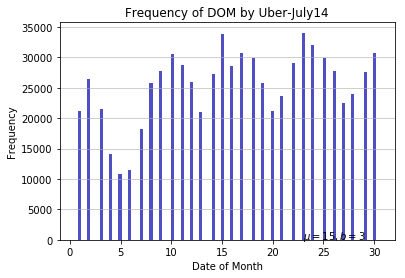

In [10]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(df_uber.DOM.sort_values(), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=3.1 , range=(0.5,30.5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Date of Month')
plt.ylabel('Frequency')
plt.title('Frequency of DOM by Uber-July14')
plt.text(23, 45, r'$\mu=15, b=3$')

Text(23, 45, '$\\mu=15, b=3$')

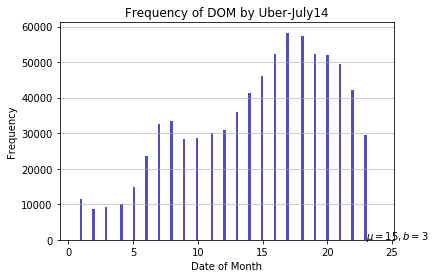

In [11]:
n, bins, patches = plt.hist(df_uber.Hour, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=3.1 , range=(0.5,24))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Date of Month')
plt.ylabel('Frequency')
plt.title('Frequency of DOM by Uber-July14')
plt.text(23, 45, r'$\mu=15, b=3$')

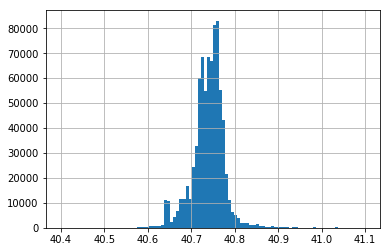

In [12]:
df_uber['Lat'].hist(bins=100, range=(40.4,41.1))

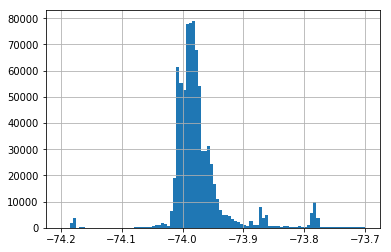

In [13]:
df_uber['Lon'].hist(bins=100, range=(-74.2,-73.7))

**Seaborn Kernel Density Estimation (KDE) Plot**

 Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis

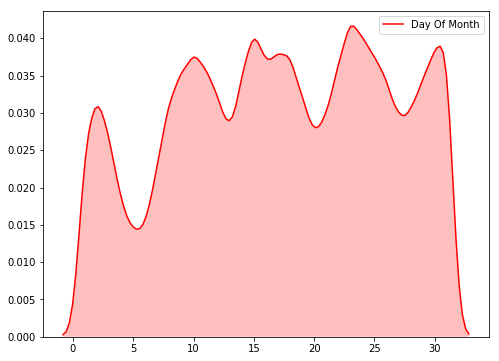

In [14]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.kdeplot(pd.Series(df_uber['DOM'], name="Day Of Month"),shade=True, color='r')
plt.show()

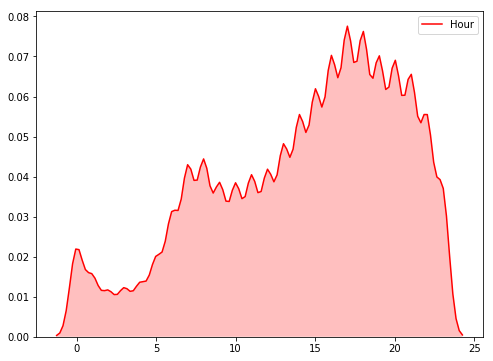

In [15]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.kdeplot(pd.Series(df_uber['Hour'], name="Hour"),shade=True, color='r')
plt.show()

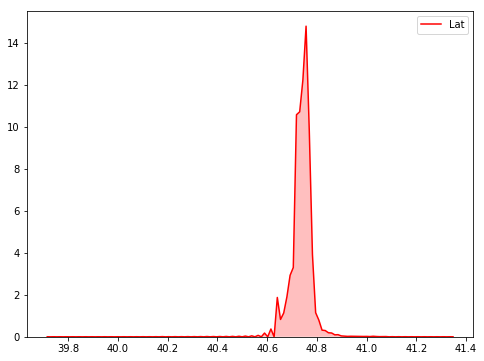

In [16]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.kdeplot(pd.Series(df_uber['Lat'], name="Lat"),shade=True, color='r')
plt.show()

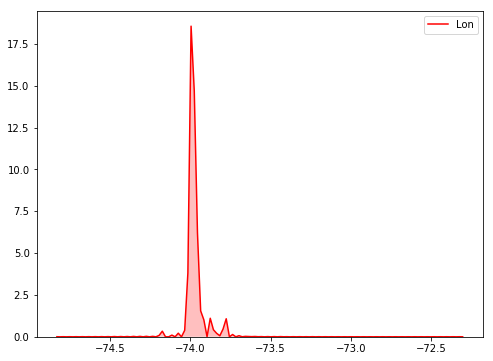

In [17]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.kdeplot(pd.Series(df_uber['Lon'], name="Lon"),shade=True, color='r')
plt.show()